In [141]:
import pandas as pd
import numpy as np
import os
import explore_r as ex
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["font.size"] = 10
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import re

## READ .csv

In [2]:
df = pd.read_csv('prepped_data.csv')

In [3]:
df.sample(20)

,date,day_of_week,start_time,week_num,home_score,home_wins,away_score,away_wins,temp,humidity,...,ou,is_under,is_push,abnormal_start,playoffs,total_scores,is_playoff,playoff_implications,is_turf,is_outdoor
10218,1981-11-15,Sunday,1,11,6,2,17,5,45,92,...,51.0,1,0,0,0,23,0,1,1,1
7168,1995-11-12,Sunday,4,11,24,3,30,4,66,49,...,40.0,0,0,0,0,54,0,1,0,1
1543,2017-10-15,Sunday,4,6,13,5,19,3,60,0,...,46.0,1,0,0,0,32,0,0,0,1
3563,2009-11-29,Sunday,8,12,20,5,17,6,58,64,...,34.0,0,0,1,0,37,0,1,1,1
9378,1985-11-24,Sunday,4,12,3,4,34,7,30,78,...,41.0,1,0,0,0,37,0,1,1,1
179,2022-10-23,Sunday,1,7,17,2,23,5,72,0,...,43.5,1,0,0,0,40,0,0,0,1
7171,1995-11-12,Sunday,8,11,31,5,13,5,43,75,...,39.0,0,0,1,0,44,0,1,1,1
5457,2002-10-20,Sunday,1,7,20,1,7,1,57,50,...,49.0,1,0,0,0,27,0,0,0,1
4234,2007-09-09,Sunday,1,1,7,0,34,0,71,80,...,36.5,0,0,0,0,41,0,0,0,1
3420,2010-09-26,Sunday,1,3,24,1,17,0,64,83,...,36.5,0,0,0,0,41,0,0,1,1


## drop cols

In [4]:
df.drop(columns=['playoffs', 'is_push'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10811 entries, 0 to 10810
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  10811 non-null  object 
 1   day_of_week           10811 non-null  object 
 2   start_time            10811 non-null  int64  
 3   week_num              10811 non-null  int64  
 4   home_score            10811 non-null  int64  
 5   home_wins             10811 non-null  int64  
 6   away_score            10811 non-null  int64  
 7   away_wins             10811 non-null  int64  
 8   temp                  10811 non-null  int64  
 9   humidity              10811 non-null  int64  
 10  wind                  10811 non-null  int64  
 11  spread                10811 non-null  float64
 12  ou                    10811 non-null  float64
 13  is_under              10811 non-null  int64  
 14  abnormal_start        10811 non-null  int64  
 15  total_scores       

## redefine spread column

In [6]:
df['spread'] = abs(df['spread'])

In [7]:
df.sample(10)

,date,day_of_week,start_time,week_num,home_score,home_wins,away_score,away_wins,temp,humidity,wind,spread,ou,is_under,abnormal_start,total_scores,is_playoff,playoff_implications,is_turf,is_outdoor
6830,1996-12-22,Sunday,1,17,28,1,31,7,32,54,11,3.5,37.0,0,0,59,0,1,1,1
361,2021-12-12,Sunday,1,14,48,8,9,6,47,34,19,10.0,48.0,0,0,57,0,1,0,1
9115,1986-12-13,Saturday,12,15,24,10,45,5,32,51,22,6.5,38.0,0,1,69,0,1,1,1
7452,1994-10-16,Sunday,4,7,24,4,13,4,68,97,12,8.5,42.0,1,0,37,0,0,1,1
1677,2016-12-18,Sunday,4,15,3,8,16,11,18,0,0,3.0,43.0,1,0,19,0,1,0,1
1702,2016-12-04,Sunday,1,13,21,5,13,6,32,0,0,6.5,44.5,1,0,34,0,1,0,1
6276,1999-10-03,Sunday,8,4,22,2,21,2,72,0,0,3.5,40.5,0,1,43,0,0,1,0
1150,2018-12-10,Monday,8,14,21,7,7,6,48,0,0,3.0,45.5,1,1,28,0,1,1,1
7611,1993-12-05,Sunday,4,14,13,5,10,7,57,74,6,3.0,37.5,1,0,23,0,1,0,1
539,2021-09-19,Sunday,1,2,17,1,26,1,77,60,4,6.0,47.0,1,0,43,0,0,0,1


## UNIVARIATE Analysis

## Summary

In [8]:
ex.summarize(df)

SUMMARY REPORT


Dataframe head: 
         date day_of_week  start_time  week_num  home_score  home_wins  \
0  2023-02-12      Sunday           6        19          35         16   
1  2023-01-29      Sunday           3        19          31         15   
2  2023-01-29      Sunday           6        19          23         15   
3  2023-01-22      Sunday           3        19          10         14   
4  2023-01-22      Sunday           6        19          19         14   

   away_score  away_wins  temp  humidity  wind  spread    ou  is_under  \
0          38         16    72         0     0     1.0  51.0         0   
1           7         15    52        48    14     2.5  45.5         1   
2          20         14    22        55    13     1.5  48.0         1   
3          27         13    32        10     0     5.5  49.0         1   
4          12         13    55        47    19     4.0  47.0         1   

   abnormal_start  total_scores  is_playoff  playoff_implications  is_turf  

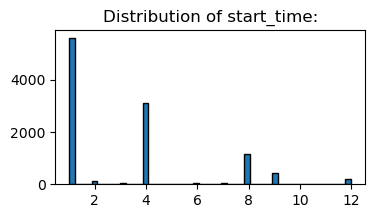

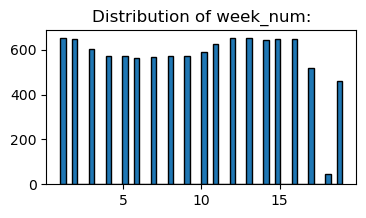

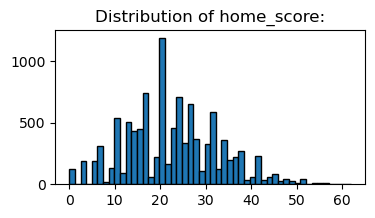

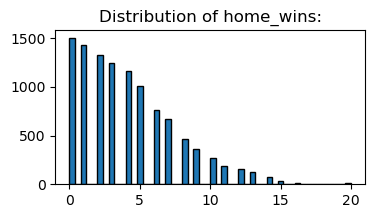

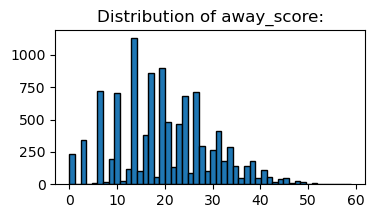

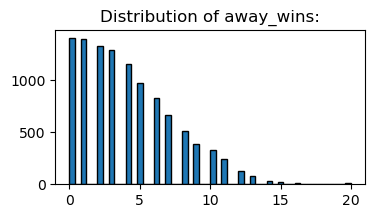

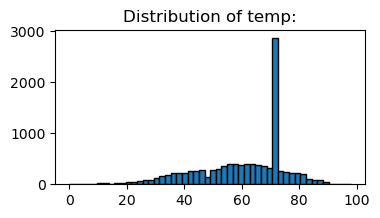

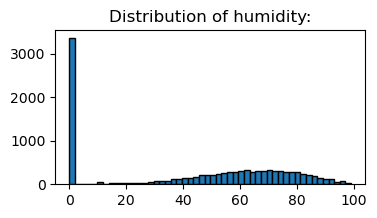

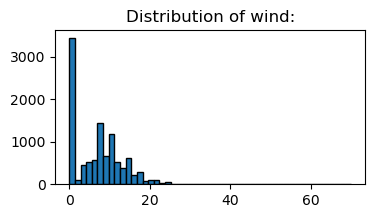

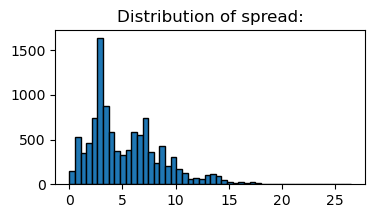

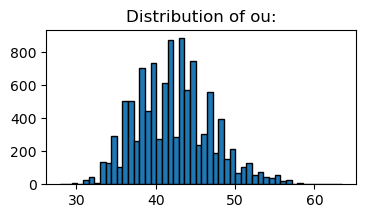

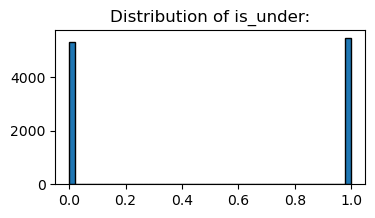

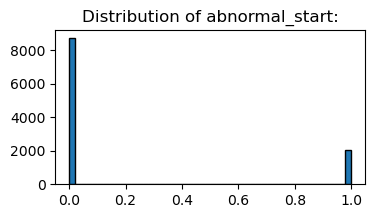

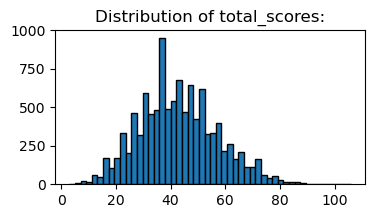

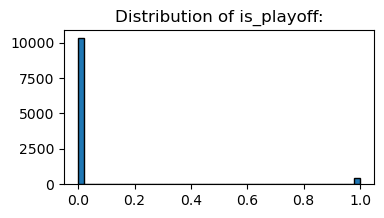

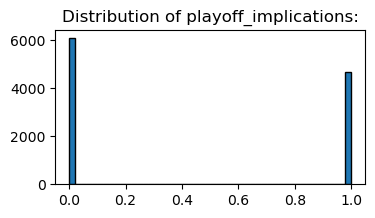

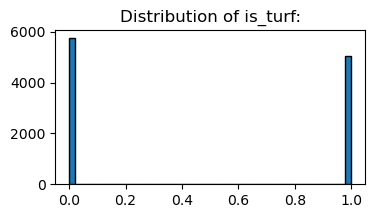

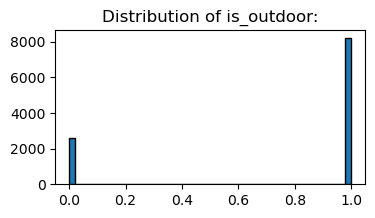

In [9]:
ex.get_hist(df)

## Now we split into TRAIN-VALIDATE-TEST for Bivariate Analysis and Statistical Testing

In [10]:
train, validate, test = ex.split_data(df)

In [11]:
train.shape, validate.shape, test.shape

((6471, 20), (2394, 20), (1946, 20))

In [12]:
train.columns.to_list()

['date',
 'day_of_week',
 'start_time',
 'week_num',
 'home_score',
 'home_wins',
 'away_score',
 'away_wins',
 'temp',
 'humidity',
 'wind',
 'spread',
 'ou',
 'is_under',
 'abnormal_start',
 'total_scores',
 'is_playoff',
 'playoff_implications',
 'is_turf',
 'is_outdoor']

## GroupBy Target...just numbers

In [13]:
df_mean_by_target = train.groupby(by=['is_under']).mean()

In [14]:
df_mean_by_target.drop(columns=['start_time', 'home_score','home_wins','away_score',
                                'away_wins','total_scores'], inplace=True)

In [15]:
df_std_by_target = train.groupby(by='is_under').std()

In [16]:
df_std_by_target.drop(columns=['start_time', 'home_score','home_wins','away_score',
                                'away_wins','total_scores'], inplace=True)

In [39]:
df_mean_by_target

,week_num,temp,humidity,wind,spread,ou,abnormal_start,is_playoff,playoff_implications,is_turf,is_outdoor
is_under,,,,,,,,,,,
0,9.519497,60.322956,42.680189,6.565094,5.378774,42.191038,0.178616,0.043711,0.433333,0.471069,0.753145
1,9.504710,60.170161,44.421452,7.155880,5.403677,42.405834,0.190520,0.042236,0.430872,0.443634,0.777575


In [18]:
df_std_by_target

,week_num,temp,humidity,wind,spread,ou,abnormal_start,is_playoff,playoff_implications,is_turf,is_outdoor
is_under,,,,,,,,,,,
0,5.210685,15.930481,32.730705,5.778373,3.453621,4.753079,0.383091,0.204483,0.495614,0.499241,0.431250
1,5.212758,15.970629,32.649658,6.223034,3.506852,4.755404,0.392771,0.201159,0.495274,0.496888,0.415938


In [19]:
df_mean_by_target_by_inout = train.groupby(by=['is_under','is_outdoor']).mean()

In [20]:
df_mean_by_target_by_inout.drop(columns=['start_time', 'home_score','home_wins','away_score',
                                'away_wins','total_scores'], inplace=True)

In [21]:
df_mean_by_target_by_inout

week_num       temp   humidity      wind    spread  \
is_under is_outdoor                                                       
0        0           9.633121  72.000000   0.000000  0.000000  5.101911   
         1           9.482255  56.495616  56.669311  8.716910  5.469520   
1        0           9.669399  72.000000   0.000000  0.000000  5.568989   
         1           9.457601  56.786245  57.128175  9.202814  5.356389   

                            ou  abnormal_start  is_playoff  \
is_under is_outdoor                                          
0        0           44.109554        0.201274    0.042038   
         1           41.562213        0.171190    0.044259   
1        0           44.278825        0.188525    0.028689   
         1           41.870066        0.191090    0.046112   

                     playoff_implications   is_turf  
is_under is_outdoor                                  
0        0                       0.426752  0.866242  
         1                       0.435491  0.341545  
1        0                       0.452186  0.887978  
         1                       0.424775  0.316530

## TEMP vs TARGET: all games

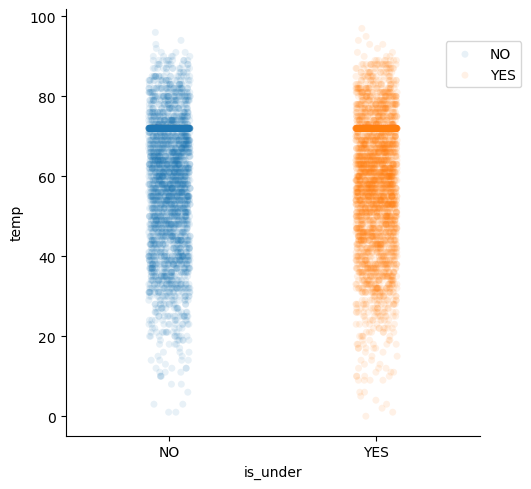

In [22]:
sns.catplot(data=train, x='is_under', y='temp',hue='is_under',order=[0,1],ec='black',alpha=0.1)
plt.xticks(ticks=[0,1],labels=['NO','YES'])
# plt.xlabel('playoffs')
# plt.ylabel('opp_pts')
plt.legend(labels=['NO','YES'],loc='lower left', bbox_to_anchor=(.9, .8))
plt.show()

#### Solid line is at 72$^{\circ}$ F: Indoor Games - the preponderance of indoor games (72 $^{\circ}$) may be skewing this...let's view only OUTDOOR games.

In [23]:
df.head()

,date,day_of_week,start_time,week_num,home_score,home_wins,away_score,away_wins,temp,humidity,wind,spread,ou,is_under,abnormal_start,total_scores,is_playoff,playoff_implications,is_turf,is_outdoor
0,2023-02-12,Sunday,6,19,35,16,38,16,72,0,0,1.0,51.0,0,0,73,1,1,0,0
1,2023-01-29,Sunday,3,19,31,15,7,15,52,48,14,2.5,45.5,1,0,38,1,1,0,1
2,2023-01-29,Sunday,6,19,23,15,20,14,22,55,13,1.5,48.0,1,0,43,1,1,0,1
3,2023-01-22,Sunday,3,19,10,14,27,13,32,10,0,5.5,49.0,1,0,37,1,1,1,1
4,2023-01-22,Sunday,6,19,19,14,12,13,55,47,19,4.0,47.0,1,0,31,1,1,0,1


## TEMP vs TARGET: OUTDOOR games

In [24]:
train_outdoor = train[train.is_outdoor == 1]
train_indoor = train[train.is_outdoor == 0]

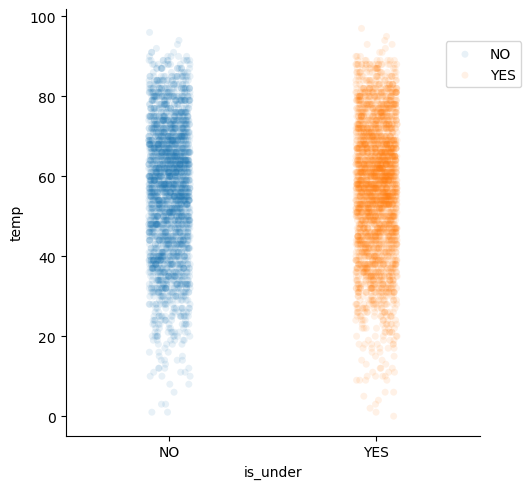

In [25]:
sns.catplot(data=train_outdoor, x='is_under', y='temp',hue='is_under',order=[0,1],ec='black',alpha=0.1)
plt.xticks(ticks=[0,1],labels=['NO','YES'])
# plt.xlabel('playoffs')
# plt.ylabel('opp_pts')
plt.legend(labels=['NO','YES'],loc='lower left', bbox_to_anchor=(.9, .8))
plt.show()

#### Slightly differeing distributions...colder games may lead to more OVERS, but the difference may not be statistically significant.  However, we may very well have the Power to identify a difference should one exist.  No pressing need to run a T-test yet.

## WIND vs TARGET: OUTDOOR games

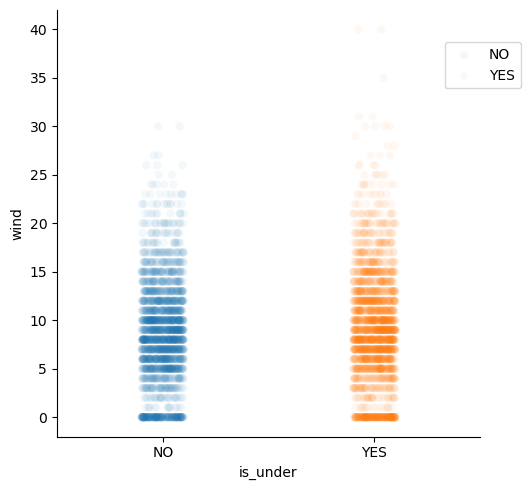

In [26]:
sns.catplot(data=train_outdoor, x='is_under', y='wind',hue='is_under',order=[0,1],ec='black',alpha=0.05,s=6)
plt.xticks(ticks=[0,1],labels=['NO','YES'])
# plt.xlabel('playoffs')
# plt.ylabel('opp_pts')
plt.legend(labels=['NO','YES'],loc='lower left', bbox_to_anchor=(.9, .8))
plt.show()

## MEAN Wind Speed of ALL UNDER games vs MEAN Wind Speed of ALL OVER games
### Does a statistically significant difference exist between Wind Speed of ALL UNDER games vs MEAN Wind Speed of ALL OVER games?
#### T-test, 2-sample, 2-tailed
### Hypotheses:
- ${H_0}$: No statistically significant difference exists between mean wind speed for UNDER games and that of OVER games.
- ${H_a}$: A statistically significant difference exists between mean wind speed for UNDER games and that of OVER games.

In [27]:
# type "\alpha", then hit the TAB key
α = 0.05
wind_under_values = train[train.is_under == 1].wind
wind_over_values = train[train.is_under == 0].wind
t, p = stats.ttest_ind(wind_under_values,wind_over_values,equal_var=True)
print(t,p,α)
print(f'p = {p:f}')

3.9540841378709994 7.764812347880434e-05 0.05
p = 0.000078


### With a p-value well below $\alpha$ = 0.05, we reject the null hypothesis.  There is evidence to suggest that the two samples were drawn from different populations.  i.e. Wind Speed may play a role in determining the outcome of the wager.

## MEAN Wind Speed of OUTDOOR UNDER games vs MEAN Wind Speed of OUTDOOR OVER games
### Does a statistically significant difference exist between MEAN Wind Speed of OUTDOOR UNDER games vs MEAN Wind Speed of OUTDOOR OVER games?
#### T-test, 2-sample, 2-tailed
### Hypotheses:
- ${H_0}$: No statistically significant difference exists between mean wind speed for OUTDOOR UNDER games and that of OUTDOOR OVER games.
- ${H_a}$: A statistically significant difference exists between mean wind speed for OUTDOOR UNDER games and that of OUTDOOR OVER games.

In [28]:
# type "\alpha", then hit the TAB key
α = 0.05
wind_under_values = train_outdoor[train_outdoor.is_under == 1].wind
wind_over_values = train_outdoor[train_outdoor.is_under == 0].wind
t, p = stats.ttest_ind(wind_under_values,wind_over_values,equal_var=True)
print(t,p,α)
print(f'p = {p:f}')

3.209420840661326 0.0013385130004450586 0.05
p = 0.001339


### With a p-value well below $\alpha$ = 0.05, we reject the null hypothesis.  There is evidence to suggest that the two samples were drawn from different populations.  i.e. Wind Speed may play a role in determining the outcome of the wager.

In [29]:
# train.groupby(by='wind').mean()

In [30]:
a = pd.DataFrame(train.groupby(by='wind').is_under.mean())

In [31]:
b = pd.DataFrame(train.groupby(by='wind').wind.count())

In [32]:
wind_dist = pd.concat([a,b],axis=1)
wind_dist.columns = ['under_pct','count']

In [33]:
wind_dist.sort_values('under_pct',ascending=False)

,under_pct,count
wind,,
40,1.000000,2
29,1.000000,1
28,1.000000,2
35,1.000000,1
31,1.000000,2
25,0.750000,8
21,0.685714,35
30,0.666667,6
18,0.661538,65


<AxesSubplot:xlabel='wind'>

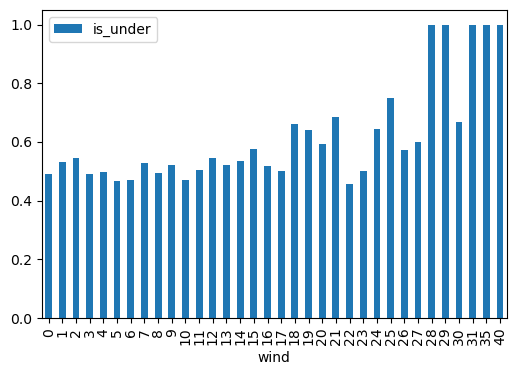

In [115]:
a.sort_index().plot.bar()

<AxesSubplot:xlabel='wind'>

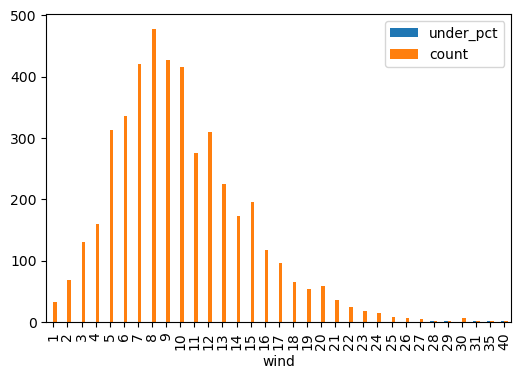

In [116]:
wind_dist[wind_dist.index != 0].sort_index().plot.bar()

### Define WINDY and non-WINDY

In [117]:
train_windy = train[train.wind >= 13]
train_not_windy = train[train.wind < 13]

In [118]:
train_windy.is_under.value_counts(normalize=True)

1    0.559964
0    0.440036
Name: is_under, dtype: float64

### Ok, done with WIND for now

### Quick look at heat map? You know you want to...  First, lets define a subset of cols

In [43]:
train.columns

Index(['date', 'day_of_week', 'start_time', 'week_num', 'home_score',
       'home_wins', 'away_score', 'away_wins', 'temp', 'humidity', 'wind',
       'spread', 'ou', 'is_under', 'abnormal_start', 'total_scores',
       'is_playoff', 'playoff_implications', 'is_turf', 'is_outdoor'],
      dtype='object')

In [44]:
train_heat = train.drop(columns=['start_time','date','home_score','home_wins', 'away_score', 
                                 'away_wins', 'total_scores'])

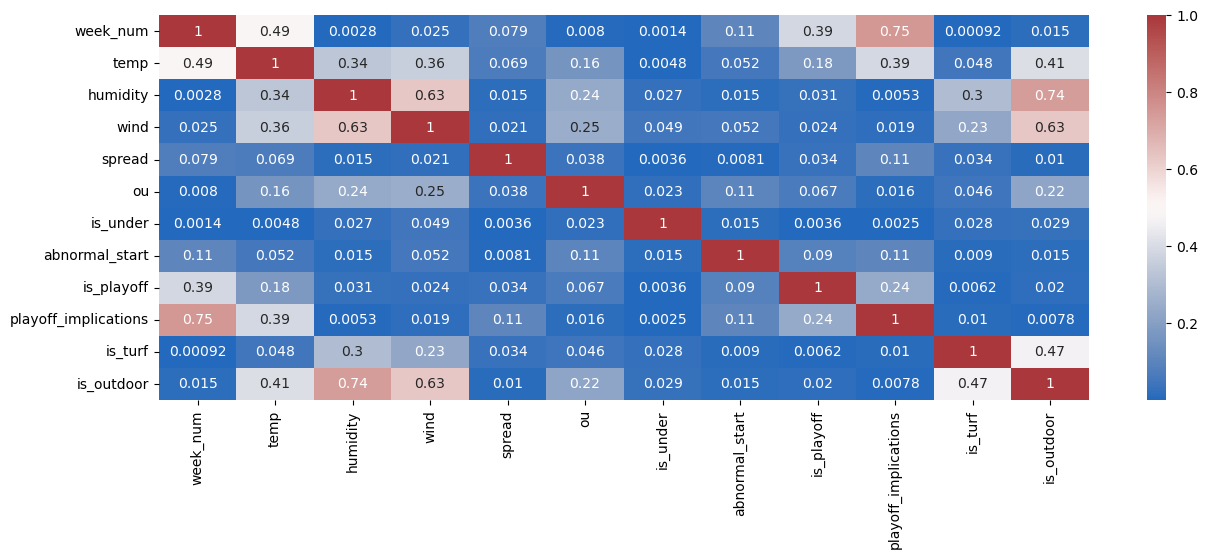

In [52]:
fig = plt.figure(figsize=(15,5))
sns.heatmap(train_heat.corr().abs(),
           cmap='vlag',
           annot=True,
           #mask=np.triu(train.corr(),1)
           )
plt.show()

### Ok, no feature appears to correlate strongly with TARGET (is_under)

## is_PLAYOFF vs TARGET: ALL games

In [61]:
train.is_playoff.value_counts(normalize=True)

0    0.957039
1    0.042961
Name: is_playoff, dtype: float64

In [54]:
train[train['is_under'] == 1].is_playoff.value_counts(normalize=True)

0    0.957764
1    0.042236
Name: is_playoff, dtype: float64

In [55]:
train[train['is_under'] == 0].is_playoff.value_counts(normalize=True)

0    0.956289
1    0.043711
Name: is_playoff, dtype: float64

In [57]:
train[train['is_playoff'] == 1].is_under.value_counts()

0    139
1    139
Name: is_under, dtype: int64

In [59]:
train[train['is_playoff'] == 0].is_under.value_counts(normalize=True)

1    0.508962
0    0.491038
Name: is_under, dtype: float64

## MEAN is_UNDER of ALL PLAYOFF games vs MEAN is_UNDER of ALL NON-PLAYOFF games
### Does a statistically significant difference exist between MEAN is_UNDER of ALL PLAYOFF games vs MEAN is_UNDER of ALL NON-PLAYOFF games?
#### T-test, 2-sample, 2-tailed
### Hypotheses:
- ${H_0}$: No statistically significant difference exists between MEAN is_UNDER of ALL PLAYOFF games and that of ALL NON-PLAYOFF games.
- ${H_a}$: A statistically significant difference exists between MEAN is_UNDER of ALL PLAYOFF games and that of ALL NON-PLAYOFF games.

In [62]:
# type "\alpha", then hit the TAB key
α = 0.05
playoff_under_values = train[train.is_playoff == 1].is_under
non_playoff_under_values = train[train.is_playoff == 0].is_under
t, p = stats.ttest_ind(playoff_under_values,non_playoff_under_values,equal_var=True)
print(t,p,α)
print(f'p = {p:f}')

-0.29235382784809966 0.7700254824754502 0.05
p = 0.770025


### With a p-value well ABOVE $\alpha$ = 0.05, we FAIL TO REJECT the null hypothesis.  There is evidence to suggest that the two samples were drawn from THE SAME population,  i.e. is_playoff may NOT play a role in determining the outcome of the wager.

## chi$^{2}$

In [81]:
observed = pd.crosstab(train.is_playoff, train.is_under)
observed

is_under,0,1
is_playoff,,
0,3041,3152
1,139,139


In [82]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [87]:
p,expected

(0.8172521213831413,
 array([[3043.38433009, 3149.61566991],
        [ 136.61566991,  141.38433009]]))

## is_OUTDOOR vs TARGET: ALL games

In [63]:
train.is_outdoor.value_counts(normalize=True)

1    0.765569
0    0.234431
Name: is_outdoor, dtype: float64

In [64]:
train[train['is_under'] == 1].is_outdoor.value_counts(normalize=True)

1    0.777575
0    0.222425
Name: is_outdoor, dtype: float64

In [65]:
train[train['is_under'] == 0].is_outdoor.value_counts(normalize=True)

1    0.753145
0    0.246855
Name: is_outdoor, dtype: float64

In [71]:
train[train['is_outdoor'] == 1].is_under.value_counts(normalize=True)

1    0.516552
0    0.483448
Name: is_under, dtype: float64

In [72]:
train[train['is_outdoor'] == 0].is_under.value_counts(normalize=True)

0    0.517469
1    0.482531
Name: is_under, dtype: float64

## MEAN is_UNDER of ALL OUTDOOR games vs MEAN is_UNDER of ALL INDOOR games
### Does a statistically significant difference exist between MEAN is_UNDER of ALL OUTDOOR games vs MEAN is_UNDER of ALL INDOOR games?
#### T-test, 2-sample, 2-tailed
### Hypotheses:
- ${H_0}$: No statistically significant difference exists between MEAN is_UNDER of ALL OUTDOOR games and that of ALL INDOOR games.
- ${H_a}$: A statistically significant difference exists between MEAN is_UNDER of ALL OUTDOOR games and that of ALL INDOOR games.

In [73]:
# type "\alpha", then hit the TAB key
α = 0.05
outdoor_under_values = train[train.is_outdoor == 1].is_under
indoor_under_values = train[train.is_outdoor == 0].is_under
t, p = stats.ttest_ind(outdoor_under_values,indoor_under_values,equal_var=True)
print(t,p,α)
print(f'p = {p:f}')

2.3197388970019928 0.02038597879574917 0.05
p = 0.020386


### With a p-value BELOW $\alpha$ = 0.05, we REJECT the null hypothesis.  There is evidence to suggest that the two samples were drawn from DIFFERENT populations,  i.e. is_OUTDOOR may play a role in determining the outcome of the wager.

## chi$^{2}$

In [88]:
observed = pd.crosstab(train.is_outdoor, train.is_under)
observed

is_under,0,1
is_outdoor,,
0,785,732
1,2395,2559


In [89]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [90]:
p,expected

(0.022033779296383678,
 array([[ 745.48910524,  771.51089476],
        [2434.51089476, 2519.48910524]]))

## hjfh vs TARGET: ALL games

In [74]:
train.playoff_implications.value_counts(normalize=True)

0    0.567918
1    0.432082
Name: playoff_implications, dtype: float64

In [75]:
train[train['is_under'] == 1].playoff_implications.value_counts(normalize=True)

0    0.569128
1    0.430872
Name: playoff_implications, dtype: float64

In [76]:
train[train['is_under'] == 0].playoff_implications.value_counts(normalize=True)

0    0.566667
1    0.433333
Name: playoff_implications, dtype: float64

In [77]:
train[train['playoff_implications'] == 1].is_under.value_counts(normalize=True)

1    0.507153
0    0.492847
Name: is_under, dtype: float64

In [78]:
train[train['playoff_implications'] == 0].is_under.value_counts(normalize=True)

1    0.50966
0    0.49034
Name: is_under, dtype: float64

In [79]:
# type "\alpha", then hit the TAB key
α = 0.05
playimp_under_values = train[train.playoff_implications == 1].is_under
noplayimp_under_values = train[train.playoff_implications == 0].is_under
t, p = stats.ttest_ind(playimp_under_values,noplayimp_under_values,equal_var=True)
print(t,p,α)
print(f'p = {p:f}')

-0.19978243302142223 0.8416570202271818 0.05
p = 0.841657


## chi$^{2}$

In [91]:
observed = pd.crosstab(train.playoff_implications, train.is_under)
observed

is_under,0,1
playoff_implications,,
0,1802,1873
1,1378,1418


In [92]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [119]:
p,expected,degf

(0.5226827866142616,
 array([[2592.74918869, 2683.25081131],
        [ 587.25081131,  607.74918869]]),
 1)

## is_TURF vs TARGET: ALL games

In [80]:
train.is_turf.value_counts(normalize=True)

0    0.542884
1    0.457116
Name: is_turf, dtype: float64

In [94]:
train[train['is_under'] == 1].is_turf.value_counts(normalize=True)

0    0.556366
1    0.443634
Name: is_turf, dtype: float64

In [95]:
train[train['is_under'] == 0].is_turf.value_counts(normalize=True)

0    0.528931
1    0.471069
Name: is_turf, dtype: float64

In [96]:
train[train['is_turf'] == 1].is_under.value_counts(normalize=True)

0    0.506423
1    0.493577
Name: is_under, dtype: float64

In [97]:
train[train['is_turf'] == 0].is_under.value_counts(normalize=True)

1    0.521207
0    0.478793
Name: is_under, dtype: float64

In [98]:
# type "\alpha", then hit the TAB key
α = 0.05
turf_under_values = train[train.is_turf == 1].is_under
grass_under_values = train[train.is_turf == 0].is_under
t, p = stats.ttest_ind(turf_under_values,grass_under_values,equal_var=True)
print(t,p,α)
print(f'p = {p:f}')

-2.2152768168100945 0.02677576826385493 0.05
p = 0.026776


## chi$^{2}$

In [99]:
observed = pd.crosstab(train.is_turf, train.is_under)
observed

is_under,0,1
is_turf,,
0,1682,1831
1,1498,1460


In [100]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [101]:
p,expected

(0.028537205035039762,
 array([[1726.36995828, 1786.63004172],
        [1453.63004172, 1504.36995828]]))

## ABNORMAL_start vs TARGET: ALL games

In [102]:
train.abnormal_start.value_counts(normalize=True)

0    0.81533
1    0.18467
Name: abnormal_start, dtype: float64

In [103]:
train[train['is_under'] == 1].abnormal_start.value_counts(normalize=True)

0    0.80948
1    0.19052
Name: abnormal_start, dtype: float64

In [104]:
train[train['is_under'] == 0].abnormal_start.value_counts(normalize=True)

0    0.821384
1    0.178616
Name: abnormal_start, dtype: float64

In [105]:
train[train['abnormal_start'] == 1].is_under.value_counts(normalize=True)

1    0.524686
0    0.475314
Name: is_under, dtype: float64

In [106]:
train[train['abnormal_start'] == 0].is_under.value_counts(normalize=True)

1    0.504928
0    0.495072
Name: is_under, dtype: float64

In [107]:
# type "\alpha", then hit the TAB key
α = 0.05
abnormal_under_values = train[train.abnormal_start == 1].is_under
normal_under_values = train[train.abnormal_start == 0].is_under
t, p = stats.ttest_ind(abnormal_under_values,normal_under_values,equal_var=True)
print(t,p,α)
print(f'p = {p:f}')

1.233605342746249 0.2173948197420562 0.05
p = 0.217395


## chi$^{2}$

In [109]:
observed = pd.crosstab(train.abnormal_start, train.is_under)
observed

is_under,0,1
abnormal_start,,
0,2612,2664
1,568,627


In [110]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [112]:
p,expected,degf

(0.22951489890087268,
 array([[2592.74918869, 2683.25081131],
        [ 587.25081131,  607.74918869]]),
 1)

## HUMIDITY vs TARGET

In [114]:
# type "\alpha", then hit the TAB key
α = 0.05
humidity_under_values = train_outdoor[train_outdoor.is_under == 1].humidity
humidity_over_values = train_outdoor[train_outdoor.is_under == 0].humidity
t, p = stats.ttest_ind(humidity_under_values,humidity_over_values,equal_var=True)
print(t,p,α)
print(f'p = {p:f}')

0.639260902861447 0.5226827866142616 0.05
p = 0.522683


# NOW MULTI-FACTOR vs TARGET

In [123]:
train_outdoor

,date,day_of_week,start_time,week_num,home_score,home_wins,away_score,away_wins,temp,humidity,wind,spread,ou,is_under,abnormal_start,total_scores,is_playoff,playoff_implications,is_turf,is_outdoor
3117,2011-10-16,Sunday,1,6,17,3,13,1,58,52,10,12.5,40.0,1,0,30,0,0,0,1
9819,1983-11-27,Sunday,1,13,26,5,3,6,51,49,14,5.0,39.5,1,0,29,0,1,0,1
6200,1999-11-07,Sunday,1,9,12,1,7,2,48,37,20,7.0,35.0,1,0,19,0,0,1,1
10797,1979-09-03,Monday,9,1,13,0,16,0,78,80,13,2.0,37.0,1,1,29,0,0,1,1
2022,2015-11-08,Sunday,1,9,28,4,23,2,56,36,10,8.0,42.0,0,0,51,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2022-01-09,Sunday,4,18,27,10,10,4,36,67,19,16.5,40.5,1,0,37,0,1,1,1
4269,2006-12-30,Saturday,8,17,28,5,34,7,48,65,7,2.0,43.0,0,1,62,0,1,0,1
133,2022-11-17,Thursday,8,11,17,4,27,6,25,81,11,3.0,41.0,0,1,44,0,1,0,1
5294,2003-01-12,Sunday,1,19,31,12,6,11,54,34,10,6.0,39.5,1,0,37,1,1,0,1


In [124]:
train_indoor

,date,day_of_week,start_time,week_num,home_score,home_wins,away_score,away_wins,temp,humidity,wind,spread,ou,is_under,abnormal_start,total_scores,is_playoff,playoff_implications,is_turf,is_outdoor
1713,2016-11-27,Sunday,1,12,38,6,19,4,72,0,0,4.0,49.0,0,0,57,0,1,1,0
2164,2014-12-28,Sunday,1,17,23,8,17,3,72,0,0,7.5,38.0,0,0,40,0,1,0,0
2554,2013-11-03,Sunday,8,9,24,2,27,5,72,0,0,1.0,42.5,0,1,51,0,0,0,0
2727,2012-12-16,Sunday,4,15,38,4,10,4,72,0,0,6.5,43.5,0,0,48,0,0,0,0
6255,1999-10-10,Sunday,1,5,42,3,20,3,72,0,0,3.0,45.5,0,0,62,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5406,2002-11-17,Sunday,1,11,24,5,17,7,72,0,0,1.5,51.0,1,0,41,0,1,1,0
4264,2006-12-31,Sunday,4,17,27,11,22,6,72,0,0,9.0,43.5,0,0,49,0,1,1,0
514,2021-09-27,Monday,8,3,41,1,21,1,72,0,0,3.5,51.5,0,1,62,0,0,1,0
9900,1983-10-16,Sunday,1,7,13,4,32,4,72,0,0,1.0,44.5,0,0,45,0,0,1,0


## INDOOR/PLAYOFF vs TARGET

## chi$^{2}$

In [120]:
observed = pd.crosstab(train_indoor.is_playoff, train_indoor.is_under)
observed

is_under,0,1
is_playoff,,
0,752,711
1,33,21


In [125]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [126]:
p,expected,degf

(0.20636432873979696,
 array([[757.05669084, 705.94330916],
        [ 27.94330916,  26.05669084]]),
 1)

## INDOOR/ABNORMAL vs TARGET

## chi$^{2}$

In [130]:
observed = pd.crosstab(train_indoor.abnormal_start, train_indoor.is_under)
observed

is_under,0,1
abnormal_start,,
0,627,594
1,158,138


In [131]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [132]:
p,expected,degf

(0.5745897176595309,
 array([[631.82926829, 589.17073171],
        [153.17073171, 142.82926829]]),
 1)

## OUTDOOR/ABNORMAL vs TARGET

## chi$^{2}$

In [133]:
observed = pd.crosstab(train_outdoor.abnormal_start, train_outdoor.is_under)
observed

is_under,0,1
abnormal_start,,
0,1985,2070
1,410,489


In [134]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [135]:
p,expected,degf

(0.07519734651407439,
 array([[1960.38050061, 2094.61949939],
        [ 434.61949939,  464.38050061]]),
 1)

## WINDY/ABNORMAL vs TARGET

## chi$^{2}$

In [136]:
observed = pd.crosstab(train_windy.abnormal_start, train_windy.is_under)
observed

is_under,0,1
abnormal_start,,
0,424,523
1,64,98


In [137]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [138]:
p,expected,degf

(0.2451193998891348,
 array([[416.7141569, 530.2858431],
        [ 71.2858431,  90.7141569]]),
 1)

## OUTDOOR/PLAYOFF_IMPLICATIONs vs TARGET

## chi$^{2}$

In [168]:
observed = pd.crosstab(train_outdoor.playoff_implications, train_outdoor.is_under)
observed

is_under,0,1
playoff_implications,,
0,1352,1472
1,1043,1087


In [137]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [138]:
p,expected,degf

(0.2451193998891348,
 array([[416.7141569, 530.2858431],
        [ 71.2858431,  90.7141569]]),
 1)